C:\Users\soyun\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\soyun\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\soyun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\soyun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot

훈련 세트 정확도: 0.947
테스트 세트 정확도: 0.918


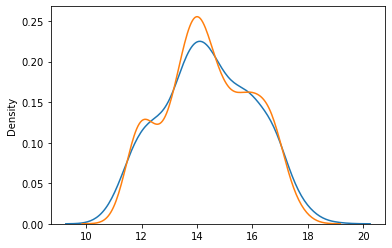

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('data.csv', encoding = 'cp949')

input_num = pd.DataFrame(data, columns = ['평균기온(℃)', '평균풍속(m/s)', '평균습도(%rh)', '평균일강수량(mm)', '일사합', 
                                               '평균전력사용량', '코스피', '미세먼지', '최저기온(℃)','최고기온(℃)', 
                                               '평균 현지기압(hPa)','평균지면온도(℃)', '합계 소형증발량(mm)'])
input_day = pd.DataFrame(data, columns = ['요일'])
input_holi = pd.DataFrame(data, columns = ['공휴일/국경일'])
input_wek = pd.DataFrame(data, columns = ['평일/주말'])
y = pd.DataFrame(data, columns = ['전력'])

# StandardScaler 객체 생성
scaler = StandardScaler()

# 데이터 세트 변환
scaler.fit(input_num)
input_num = scaler.transform(input_num)

# ndarray -> dataframe
input_num = pd.DataFrame(input_num, columns = ['평균기온(℃)', '평균풍속(m/s)', '평균습도(%rh)', '평균일강수량(mm)', '일사합', 
                                               '평균전력사용량', '코스피', '미세먼지', '최저기온(℃)','최고기온(℃)', 
                                               '평균 현지기압(hPa)','평균지면온도(℃)', '합계 소형증발량(mm)'])

# 요일 변환
encoder= LabelEncoder()
encoder.fit(input_day)
input_day= encoder.transform(input_day)
input_day = pd.DataFrame(input_day, columns = ['요일'])

input_num['일시'] = data['일시']
input_day['일시'] = data['일시']
input_holi['일시'] = data['일시']
input_wek['일시'] = data['일시']
input_num = input_num.set_index('일시')
input_day = input_day.set_index('일시')
input_holi = input_holi.set_index('일시')
input_wek = input_wek.set_index('일시')
y['일시'] = data['일시']
y = y.set_index('일시')
y = np.ravel(y, order='C')

x = input_num.join(input_day)
x = x.join(input_holi)
x = x.join(input_wek)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

for i in range(50,300,10):
    #model = RandomForestRegressor(n_estimators = 400, random_state = 0, max_features = 2, max_depth = 100)
    model = RandomForestRegressor(n_estimators = 400, max_depth = 100,
                           min_samples_split =6, min_samples_leaf =8,
                           n_jobs=-1, random_state=2, oob_score=True)
    model.fit(x_train, y_train)
    
y_test_prediction = model.predict(x_test)

ax1 = sns.distplot(y_test, hist = False , label = "y_real")
ax2 = sns.distplot(y_test_prediction, hist = False, label = "y_predict", ax = ax1)

print("훈련 세트 정확도: {:.3f}".format(model.score(x_train, y_train)) )
print("테스트 세트 정확도: {:.3f}".format(model.score(x_test, y_test)) )